In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_excel('./data/order.xlsx')
df

,Date,M3
0,2012-01-01,27
1,2012-02-01,37
2,2012-03-01,8
3,2012-04-01,9
4,2012-05-01,11
...,...,...
77,2018-06-01,310
78,2018-07-01,288
79,2018-08-01,190
80,2018-09-01,241


# 기본 데이터 확인


In [53]:
# 샘플도 적고 특징도 매우 적다
df.shape

(82, 2)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    82 non-null     datetime64[ns]
 1   M3      82 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [55]:
df.isnull().sum()

Date    0
M3      0
dtype: int64

In [56]:
df.describe()

,M3
count,82.000000
mean,82.134146
std,79.807138
min,2.000000
25%,26.250000
50%,53.500000
75%,131.000000
max,393.000000


# 발주 추이

In [57]:
df['Date'].min(), df['Date'].max() 

(Timestamp('2012-01-01 00:00:00'), Timestamp('2018-10-01 00:00:00'))

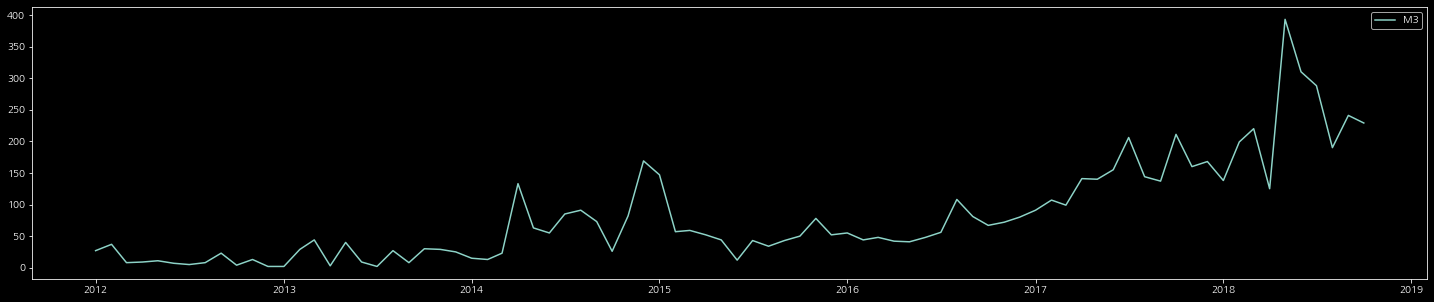

In [58]:
# 전체 기간 Plotting 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date'], df['M3'], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 5)

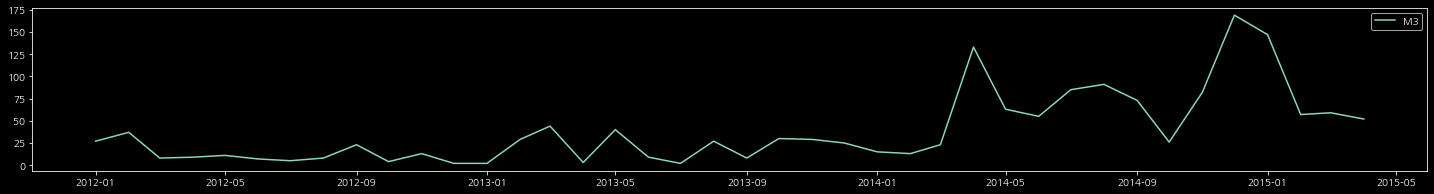

In [59]:
# 일부 기간 Plotting [0:40]
plt.plot(df['Date'][0:40], df['M3'][0:40], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 3)

In [60]:
# 월 별 비교
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head(5)

,Date,M3,year,month
0,2012-01-01,27,2012,1
1,2012-02-01,37,2012,2
2,2012-03-01,8,2012,3
3,2012-04-01,9,2012,4
4,2012-05-01,11,2012,5


In [61]:
# pivot table을 활용 년도벼 월별 자재 발주량 비교
df_pivot = pd.pivot_table(df,                  # 피벗할 데이터프레임
                      index = 'year',          # 행 위치에 들어갈 열
                      columns = 'month',       # 열 위치에 들어갈 열
                      values = 'M3')           # 데이터로 사용할 열 

df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,27.0,37.0,8.0,9.0,11.0,7.0,5.0,8.0,23.0,4.0,13.0,2.0
2013,2.0,29.0,44.0,3.0,40.0,9.0,2.0,27.0,8.0,30.0,29.0,25.0
2014,15.0,13.0,23.0,133.0,63.0,55.0,85.0,91.0,73.0,26.0,82.0,169.0
2015,147.0,57.0,59.0,52.0,44.0,12.0,43.0,34.0,43.0,50.0,78.0,52.0
2016,55.0,44.0,48.0,42.0,41.0,48.0,56.0,108.0,81.0,67.0,72.0,80.0
2017,91.0,107.0,99.0,141.0,140.0,155.0,206.0,144.0,137.0,211.0,160.0,168.0
2018,138.0,199.0,220.0,125.0,393.0,310.0,288.0,190.0,241.0,229.0,NaN,NaN


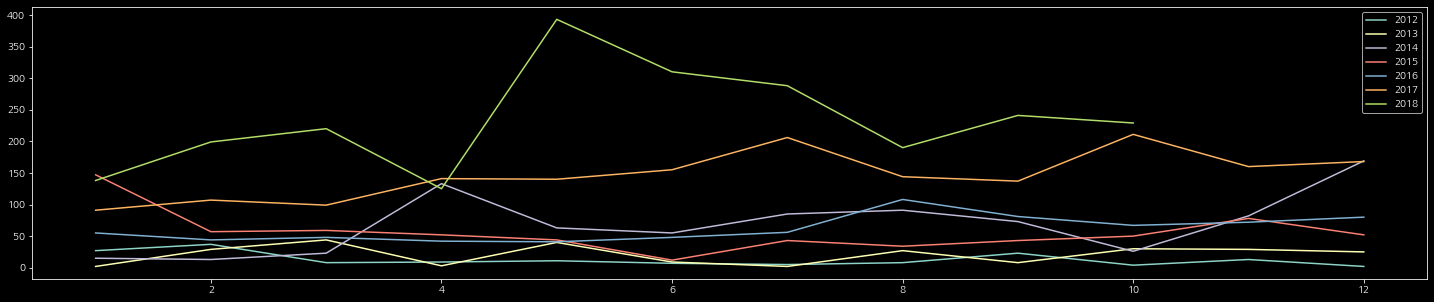

In [62]:
plt.plot(df_pivot.iloc[0,:], label='2012');
plt.plot(df_pivot.iloc[1,:], label='2013');
plt.plot(df_pivot.iloc[2,:], label='2014');
plt.plot(df_pivot.iloc[3,:], label='2015');
plt.plot(df_pivot.iloc[4,:], label='2016');
plt.plot(df_pivot.iloc[5,:], label='2017');
plt.plot(df_pivot.iloc[6,:], label='2018');
plt.legend();
plt.gcf().set_size_inches(25, 5)

# 시계열 탐색

In [63]:
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
df=df.set_index('Date')

In [65]:
df.head()

,M3,year,month
Date,,,
2012-01-01,27,2012,1
2012-02-01,37,2012,2
2012-03-01,8,2012,3
2012-04-01,9,2012,4
2012-05-01,11,2012,5


In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

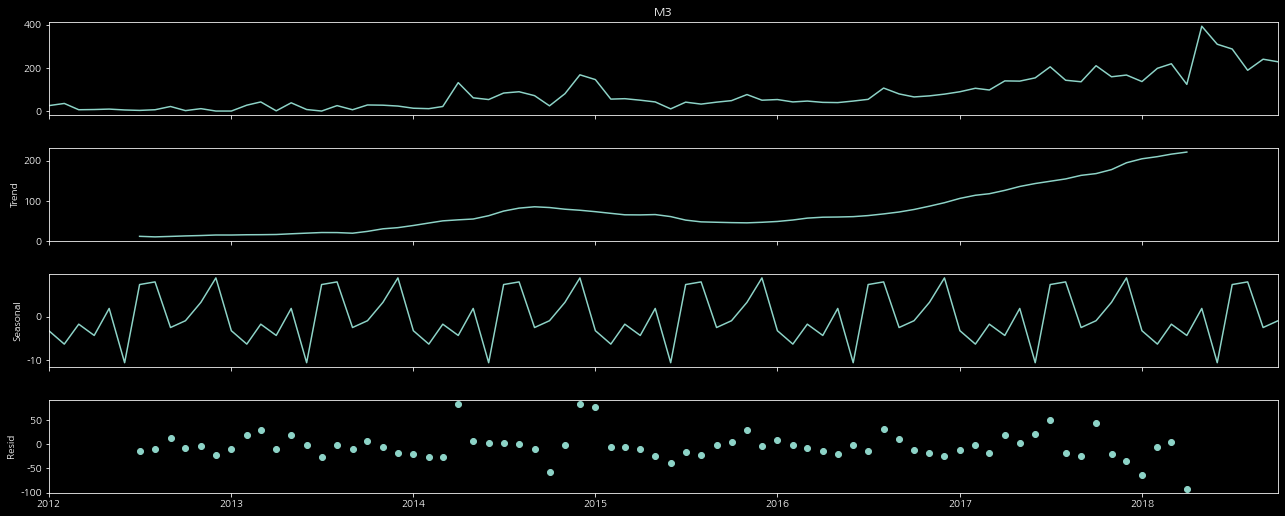

In [67]:
# 덧셈 분해 (additive decomposition) 
res = seasonal_decompose(df['M3'],model='addictive')
res.plot()
plt.gcf().set_size_inches(20, 8)
plt.show()

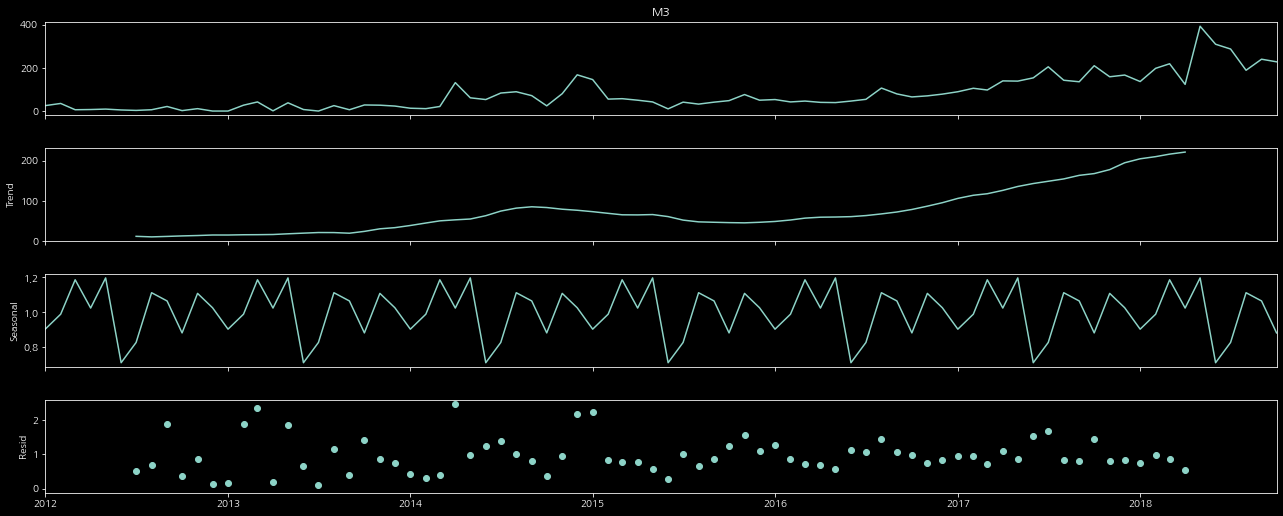

In [68]:
# 곱셈 분해 (multiplicative decomposition)
# 잔차 그래프를 보면 덧셈 분해보다 더 민감하게 변화하는 패턴을 확인할 수 있음
res = seasonal_decompose(df['M3'],model='multiplicative')
res.plot()
plt.gcf().set_size_inches(20, 8)
plt.show()

In [69]:
# attribute 활용 실제 데이터 값 조회 가능
res.observed

Date
2012-01-01     27.0
2012-02-01     37.0
2012-03-01      8.0
2012-04-01      9.0
2012-05-01     11.0
              ...  
2018-06-01    310.0
2018-07-01    288.0
2018-08-01    190.0
2018-09-01    241.0
2018-10-01    229.0
Name: M3, Length: 82, dtype: float64

In [70]:
# Trend를 표현하기 위해 앞, 뒤에 일부 데이터가 사라짐 (*약점)
res.trend

Date
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
2012-05-01   NaN
              ..
2018-06-01   NaN
2018-07-01   NaN
2018-08-01   NaN
2018-09-01   NaN
2018-10-01   NaN
Name: trend, Length: 82, dtype: float64

In [71]:
# 중간값은 채워져 있음 
res.trend[30:40]

Date
2014-07-01    74.500000
2014-08-01    81.833333
2014-09-01    85.166667
2014-10-01    83.291667
2014-11-01    79.125000
2014-12-01    76.541667
2015-01-01    73.000000
2015-02-01    68.875000
2015-03-01    65.250000
2015-04-01    65.000000
Name: trend, dtype: float64

In [72]:
# Seasonal 데이터 확인
res.seasonal

Date
2012-01-01    0.900295
2012-02-01    0.986397
2012-03-01    1.184340
2012-04-01    1.021823
2012-05-01    1.195039
                ...   
2018-06-01    0.707353
2018-07-01    0.823849
2018-08-01    1.109924
2018-09-01    1.062558
2018-10-01    0.878859
Name: seasonal, Length: 82, dtype: float64

In [73]:
# 잔차 데이터 확인
res.resid

Date
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
2012-05-01   NaN
              ..
2018-06-01   NaN
2018-07-01   NaN
2018-08-01   NaN
2018-09-01   NaN
2018-10-01   NaN
Name: resid, Length: 82, dtype: float64

# 모델링


In [74]:
import itertools
import statsmodels.api as sm

In [75]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [76]:
# 필요 없는 컬럼 사전 제거
df = df.drop(['year', 'month'], axis=1)
df.head()

,M3
Date,
2012-01-01,27
2012-02-01,37
2012-03-01,8
2012-04-01,9
2012-05-01,11


In [77]:
np.random.seed(1234)

cols = ['param','param_seasonal','aic']
lst = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            lst.append([param, param_seasonal, results.aic])
            df1 = pd.DataFrame(lst, columns=cols)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1000.3292122770475
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:831.2496601807491
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:789.7866810047587
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:664.4255818666195
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:792.2054815357808
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:771.4112962840667
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:675.0642816555652
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:666.4239232273673
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:929.455669469729
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:782.9348700017323
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:760.5470077862789
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:638.0698480454455
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:780.9654398905632
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:752.4203579971766
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:658.8043952235881
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:639.5737300620185
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:845.9343856515544
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:730.531050470377
ARIMA(0, 1,